In [14]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_csv('data_reg.csv', header=None, names=['map_cols', 'map_rows', 'agents', 'nodes_generated', 'nodes_expanded', 'density', 'runtime'])
df = dataframe[['nodes_expanded', 'runtime', 'density']]

dataframe2 = pd.read_csv('data_cg.csv', header=None, names=['map_cols', 'map_rows', 'agents', 'nodes_generated', 'nodes_expanded', 'density', 'runtime'])
df2 = dataframe2[['nodes_expanded', 'runtime', 'density']]

dataframe3 = pd.read_csv('data_dg.csv', header=None, names=['map_cols', 'map_rows', 'agents', 'nodes_generated', 'nodes_expanded', 'density', 'runtime'])
df3 = dataframe3[['nodes_expanded', 'runtime', 'density']]

dataframe4 = pd.read_csv('data_wdg.csv', header=None, names=['map_cols', 'map_rows', 'agents', 'nodes_generated', 'nodes_expanded', 'density', 'runtime'])
df4 = dataframe4[['nodes_expanded', 'runtime', 'density']]


Text(0.5, 1.0, 'nodes_expanded vs runtime')

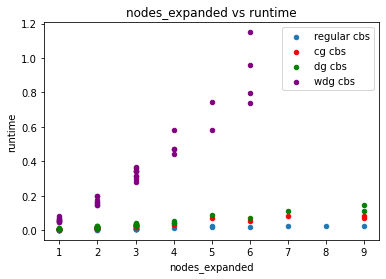

In [15]:
ax = plt.gca()
df.plot(kind='scatter', label='regular cbs', x='nodes_expanded', y="runtime", ax=ax)
df2.plot(kind='scatter', label='cg cbs', x='nodes_expanded', y="runtime", color='red', ax=ax)
df3.plot(kind='scatter', label='dg cbs', x='nodes_expanded', y="runtime", color='green', ax=ax)
df4.plot(kind='scatter', label='wdg cbs', x='nodes_expanded', y="runtime", color='purple', ax=ax)
ax.set_title('nodes_expanded vs runtime')


In [ ]:
# plot the agent-density of instance vs runtime of solution
ax = plt.gca()
df.plot(kind='scatter', label='regular cbs', x='density', y="runtime", ax=ax)
df2.plot(kind='scatter', label='cg cbs', x='density', y="runtime", color='red', ax=ax)
df3.plot(kind='scatter', label='dg cbs', x='density', y="runtime", color='green', ax=ax)
df4.plot(kind='scatter', label='wdg cbs', x='density', y="runtime", color='purple', ax=ax)
ax.set_title('density vs runtime')

# plot the agent-density of instance vs expanded nodes of solution
ax2 = plt.gca()
df.plot(kind='scatter', label='regular cbs', x='density', y="nodes_expanded", ax=ax2)
df2.plot(kind='scatter', label='cg cbs', x='density', y="nodes_expanded", color='red', ax=ax2)
df3.plot(kind='scatter', label='dg cbs', x='density', y="nodes_expanded", color='green', ax=ax2)
df4.plot(kind='scatter', label='wdg cbs', x='density', y="nodes_expanded", color='purple', ax=ax2)
ax2.set_title('density vs nodes_expanded')

In [71]:
import random

def make_empty_instance(filename, rows, cols, agents):
    file = open(filename, 'w')
    locs_generated = 0
    
    locations = []
    while (locs_generated < agents*2):
        rand_loc = (random.randint(1,rows-1), random.randint(1,cols-1))
        if (rand_loc not in locations):
            locations.append(rand_loc)
            locs_generated += 1
    
    start_locs = locations[:agents]
    goal_locs = locations[agents:]
    
    border = '@ ' * (cols+2) + '\n'
    file.write(f'{cols+2} {rows+2}\n')
    file.write(border)
    for r in range(rows):
        row = '@ '
        for c in range(cols):
            if ((r,c) in start_locs):
                row += 'S '
            elif ((r,c) in goal_locs):
                row += 'G '
            else:
                # if (random.randint(1,10) <= 4):
                #     row += '@ '
                # else:
                row += '. '
        row += '@'
        file.write(row + '\n')
    file.write(border)
    file.write(str(agents)+'\n')
    for i in range(agents):
        res = f'{start_locs[i][0]+1} {start_locs[i][1]+1} {goal_locs[i][0]+1} {goal_locs[i][1]+1}\n'
        file.write(res)
    

In [70]:
for i in range(1,11):
    filename = 'more_walls/high_density/instance__' + str(i) + '.txt'
    make_empty_instance(filename,10,10,8)


In [43]:
filename = 'more_agents/low_density/instance_1.txt'
make_empty_instance(filename,10,10, 5)

filename = 'more_agents/med_density/instance_1.txt'
make_empty_instance(filename,10,10, 10)

filename = 'more_agents/high_density/instance_1.txt'
make_empty_instance(filename,10,10, 15)

In [65]:

92-60


32

In [67]:
8/55

0.14545454545454545